In [1]:
"""This code is a simulation of the Monty Hall problem.  In this popular game hosted by Monty Hall,  
the contestant is presented with three doors.  Behind two of these doors will be a goat, and one door will 
have the grand prize of a shiny new car.
The contestant picks one door initially, and Monty hall will open one of the two remaining doors, 
which reveals one of the goats.  
The contestant then is given the option to stay with their original door selection, or swap with the other door."""

'This code is a simulation of the Monty Hall problem.  In this popular game hosted by Monty Hall,  \nthe contestant is presented with three doors.  Behind two of these doors will be a goat, and one door will \nhave the grand prize of a shiny new car.\nThe contestant picks one door initially, and Monty hall will open one of the two remaining doors, \nwhich reveals one of the goats.  \nThe contestant then is given the option to stay with their original door selection, or swap with the other door.'

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
class MH_Trial():
    """ This class represents a trial object, for the Monty Hall problem
        simulation. """
    
    def __init__(self, number_of_trials, swap=False):
        """ This method initializes the Trial class attributes. """
        self.zonk_count = 0
        self.car_count = 0
        self.number_of_trials = number_of_trials
        self.doors = ['zonk', 'zonk', 'zonk']
        self.available_doors = [0, 1, 2]
        self.final_door_number = 0
        self.swap = swap
        self.results = []
        
        
    def assign_car_to_door(self):
        """ This method randomly assigns the car to one of the three doors."""
        self.doors = ['zonk', 'zonk', 'zonk']
        car = random.randint(0, 2)
        self.doors[car] = 'car'
        
        
    def increment_zonk_count(self):
        """ This method increments the zonk counts by 1 """
        self.zonk_count += 1
        
        
    def increment_car_count(self):
        """ This method increments the car counts by 1 """
        self.car_count += 1
        
        
    def tally_result(self):
        """ This method will increment the counts of cars vs zonks depending on what is found behind
            the door selection, and append the result in the results [] """
        if self.doors[self.final_door_number] == 'zonk':
            self.increment_zonk_count()
        elif self.doors[self.final_door_number] == 'car':
            self.increment_car_count()
        
        self.results.append(self.doors[self.final_door_number])
        
        
    def pick_door(self):
        """ This method randomly selects a door which would correspond to the contestant's selection.
            if swap=True, this will set the selection to the remaining 'closed' door"""
        
        remaining_doors = self.available_doors.copy()
        self.final_door_number = random.randint(0, 2)
        
        if self.swap == True:
            remaining_doors.pop(self.final_door_number)
            open_door = random.choice(remaining_doors)
            open_door_idx = remaining_doors.index(open_door)
          
            if self.doors[open_door] == 'car':
                if open_door_idx == 0:
                    final_door_idx = 0
                else:
                    final_door_idx = 1
            else:
                
                if open_door_idx == 0:
                    final_door_idx = 1
                else:
                    final_door_idx = 0
                
            self.final_door_number = remaining_doors[final_door_idx]
            
    def print_final_tally(self):
        """ This method prints the final tally for the number of trials where a zonk was selected vs. a car"""
        
        print('The probability of picking a door with a zonk : ' + str(self.zonk_count/self.number_of_trials))
        print('The probability of picking a door with a car : ' + str(self.car_count/self.number_of_trials))
            
    def generate_result_plot(self):
        """ This method generates a histogram plot for the trial results"""
        
        sns.set()
        df = pd.DataFrame({'result' : self.results})
        df['result'].value_counts().plot(kind='bar')
        plt.xlabel('zonk vs. car')
        if self.swap == True:
            plt.ylabel('P for N trials with swap')
        else:
            plt.ylabel('P for N trials w/o swap')
            
        plt.show()
    
            
            

The probability of picking a door with a zonk : 0.6639
The probability of picking a door with a car : 0.3361


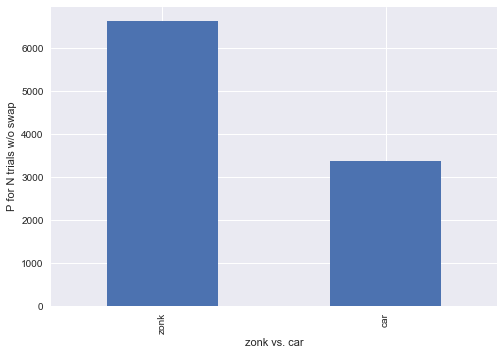

In [3]:
# Simulation 1: for the scenario where contestant does NOT swap original door selection, probability of getting
# a goat/zonk behind the original door is 2/3

N = 10000
random.seed(0)

sim1 = MH_Trial(N, swap=False)

for x in range(N):
    sim1.assign_car_to_door()
    sim1.pick_door()
    sim1.tally_result()
    
sim1.print_final_tally()
sim1.generate_result_plot()
    

The probability of picking a door with a zonk : 0.3302
The probability of picking a door with a car : 0.6698


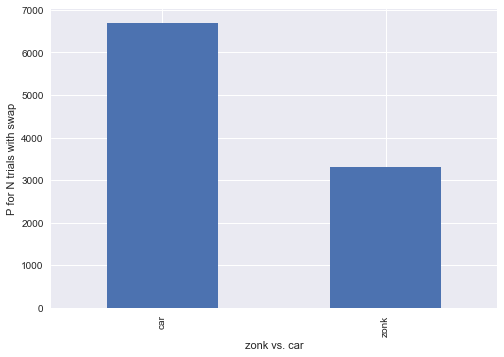

In [4]:
#Simulation 2: for the scenario where contestant swaps original door selection with remaining unopened door

random.seed(0)

sim2 = MH_Trial(N, swap=True)

for x in range(N):
    sim2.assign_car_to_door()
    sim2.pick_door()
    sim2.tally_result()

sim2.print_final_tally()
sim2.generate_result_plot()